In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas --upgrade


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [<=>                 ] (00m:00s) 
pkgs/main/noarch       

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print(pd.__version__)

1.3.5


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
# 1. Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

#Tesla = yf.Ticker("TSLA")
#print(Tesla)

#------
tsla = yf.Ticker("TSLA")
print(tsla.info)

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}


In [45]:
#2. Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. 
  # Set the period parameter to max so we get information for the maximum amount of time

#tesla_data = Tesla.history(period="max")

#Tesla = yf.Ticker("TSLA")
#print(Tesla)
#tesla_data = Tesla.history(period="max")
#print(tesla_data)


#----------------
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")

# Print 
print(tesla_data.head())

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


In [46]:
#3. Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.
    # Take a screenshot of the results and code from the beginning of Question 1 to the results below.

#tesla_data.rest_index(inplace=True)
#tesla_data.head()

#-------------------------

tsla = yf.Ticker("TSLA")

tesla_data = tsla.history(period="max")

tesla_data.reset_index(inplace=True)

# first 5 rows 
print(tesla_data.head())



        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [44]:
#4. Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm 
     # Save the text of the response as a variable named html_data.

#import requests 
#url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
#response = requests.get(url)
#data = response.text

#---------------------

import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

#print(html_data)


In [22]:
#5. Parse the html data using beautiful_soup.

#soup = BeautifulSoup(data, 'html.parser')
#title = soup.title.string
#print(title)

#------------------------

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')

# Print below
#print(soup.prettify())

In [47]:
#6. Using BeautifulSoup or the read_html function extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. 
   # The dataframe should have columns Date and Revenue.

#soup = BeautifulSoup(html_content, 'html.parser')
#table = soup.find('table', {'class': 'historical_data_table table'})
#tesla_revenue = pd.read_html(str(table))[0]
#tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue': 'Revenue', 'date': 'Date'})
#import requests
#from bs4 import BeautifulSoup
#import pandas as pd

#print(tesla_revenue)

#-----------------------------

import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tables = pd.read_html(url)
tesla_revenue = tables[0]

tesla_revenue.columns = ['Date', 'Revenue']

# resulting DataFrame
print(tesla_revenue)


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


In [51]:
#7. Execute the following line to remove the comma and dollar sign from the Revenue column.

#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

#-----------------------
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True)
print(tesla_revenue)


    Date Revenue
0   2021   53823
1   2020   31536
2   2019   24578
3   2018   21461
4   2017   11759
5   2016    7000
6   2015    4046
7   2014    3198
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [52]:
#8. Execute the following lines to remove an null or empty strings in the Revenue column.

#tesla_revenue.dropna(inplace=True)

#tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
#-----------------------------

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].notna()]
print(tesla_revenue)

    Date Revenue
0   2021   53823
1   2020   31536
2   2019   24578
3   2018   21461
4   2017   11759
5   2016    7000
6   2015    4046
7   2014    3198
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [53]:
#9. Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

tesla_revenue.tail(5)


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [54]:
#10. Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

import yfinance as yf
gme = yf.Ticker("GME")

print(gme)

yfinance.Ticker object <GME>


In [55]:
#11. Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. 
        # Set the period parameter to max so we get information for the maximum amount of time.

gme_data = gme.history(period="max")

print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620128   1.693350   1.603296   1.691666  76216000        0.0   
2002-02-14   1.712707   1.716073   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683251   1.687459   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-02-27  19.610001  19.700001  18.889999  19.100000   4006700        0.0   
2023-02-28  19.059999  19.520000  18.950001  19.230000   3373800        0.0   
2023-03-01  18.920000  19.090000  18.139999  18.150000   4210100        0.0   
2023-03-02  18.150000  18.400000  17.620001  18.190001   2622100        0.0   
2023-03-03  18.190001  19.100000  18.100000  18.7000

In [56]:
#12. Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. 
    # Take a screenshot of the results and code from the beginning of Question 3 to the results below.

gme_data.reset_index(inplace=True)
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [57]:
#13. Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. 
     # Save the text of the response as a variable named html_data.

import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data = response.text
#print(html_data)

In [58]:
#14. Parse the html data using beautiful_soup.

from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')


In [59]:
#15. Using BeautifulSoup or the read_html function extract the table with GameStop Quarterly Revenue and store it into a dataframe named gme_revenue.
     #The dataframe should have columns Date and Revenue. 
     #Make sure the comma and dollar sign is removed from the Revenue column using a method similar to what you did in Question 2.



#import pandas as pd

#tables = pd.read_html(html_data)
#gme_revenue = tables[0]
#gme_revenue = gme_revenue[['Date', 'Revenue']]
#gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all('table')[0]

dfs = pd.read_html(str(table))
gme_revenue = dfs[0].iloc[:, 0:2]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '', regex=True).astype(float)

print(gme_revenue)


    Date  Revenue
0   2022   6011.0
1   2021   5090.0
2   2020   6466.0
3   2019   8285.0
4   2018   8547.0
5   2017   7965.0
6   2016   9364.0
7   2015   9296.0
8   2014   9040.0
9   2013   8887.0
10  2012   9551.0
11  2011   9474.0
12  2010   9078.0
13  2009   8806.0


In [60]:
#16. Display the last five rows of the gme_revenue dataframe using the tail function. Take a screenshot of the results.

gme_revenue.tail()


,Date,Revenue
9,2013,8887.0
10,2012,9551.0
11,2011,9474.0
12,2010,9078.0
13,2009,8806.0


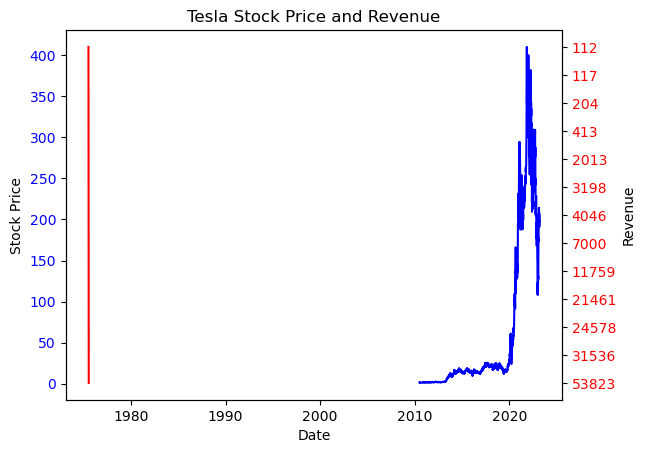

In [61]:
#17. Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. 
   # The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla'). Note the graph will only show data upto June 2021.

#make_graph(tesla_data, tesla_revenue, 'Tesla')

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Tesla Stock Price and Revenue')
    plt.show()
    
make_graph(tesla_data, tesla_revenue, 'Tesla')


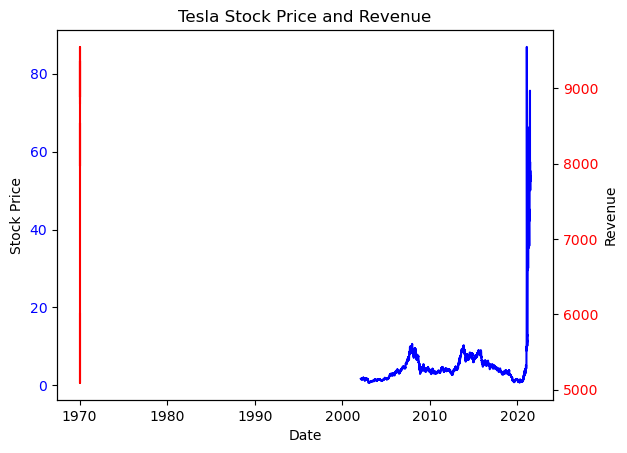

In [62]:
#18. Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. 
     # The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). 
     # Note the graph will only show data upto June 2021.

# filter data for dates up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= pd.to_datetime('2021-06-30')]
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= pd.to_datetime('2021-06-30')]

# call make_graph with filtered data and title
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')


